In [1]:
import torch
import numpy as np
import torchvision as tv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BATCH_SIZE=256

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


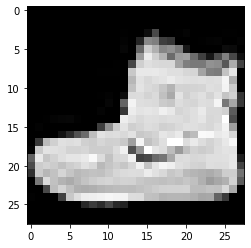

In [8]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [31]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(256, 10)
)

model

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): LogSigmoid()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [32]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.004)
num_epochs = 15

In [33]:
for ep in range(num_epochs):
    train_iters, train_passed = 0, 0
    train_loss, train_acc = 0, 0
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.5493001875725199, train_acc: 0.8015666666666666, test_loss: 0.43863104060292246, test_acc: 0.8407
ep: 1, train_loss: 0.38586134954969936, train_acc: 0.8597166666666667, test_loss: 0.39697252549231055, test_acc: 0.8549
ep: 2, train_loss: 0.34282156565087907, train_acc: 0.8733833333333333, test_loss: 0.3861359044909477, test_acc: 0.8612
ep: 3, train_loss: 0.31439853259857664, train_acc: 0.88395, test_loss: 0.3829500865191221, test_acc: 0.8653
ep: 4, train_loss: 0.291611703088943, train_acc: 0.8913666666666666, test_loss: 0.36721950992941854, test_acc: 0.8717
ep: 5, train_loss: 0.2743343124998377, train_acc: 0.8968833333333334, test_loss: 0.36171639859676363, test_acc: 0.8725
ep: 6, train_loss: 0.25878936255231816, train_acc: 0.9028, test_loss: 0.3773952003568411, test_acc: 0.8702
ep: 7, train_loss: 0.24644428269660218, train_acc: 0.90675, test_loss: 0.3560352843254805, test_acc: 0.8754
ep: 8, train_loss: 0.23288545449997516, train_acc: 0.91215, test_loss: 0.348495849